In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../data/weblogs.csv')
df.head()

,ID,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
0,obSnwGoBCue8G08E_WCX,79,592,7.589744,1.800540,0.000000,0.873418,0.126582,0.000000,0.000000,...,4.0,0.494041,0.101266,1555089.0,2.718334e+07,0.000000,0.205128,1,0,1
1,nLSnwGoBCue8G08E_WCX,350,103621,296.908300,260.332670,0.000000,0.997143,0.000000,0.002857,0.000000,...,6.0,0.341303,0.425714,2071344.0,1.427714e+01,0.547278,0.461318,4,0,1
2,ErSowGoBCue8G08ECmHa,15,368,26.285715,87.329780,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.000000,49505.0,1.413333e+01,0.642857,1.000000,2,0,0
3,E7SowGoBCue8G08ECmHa,28,11,0.407407,1.097447,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.821429,45984.0,1.332143e+01,0.037037,0.148148,5,0,0
4,FbSowGoBCue8G08ECmHa,9342,80946,8.665668,17.566462,0.000107,0.996896,0.002569,0.000214,0.000321,...,4.0,0.152943,0.953757,83171793.0,1.307407e+01,0.000000,0.023552,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67352 entries, 0 to 67351
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  67352 non-null  object 
 1   NUMBER_OF_REQUESTS  67352 non-null  int64  
 2   TOTAL_DURATION      67352 non-null  int64  
 3   AVERAGE_TIME        67352 non-null  float64
 4   STANDARD_DEVIATION  52945 non-null  float64
 5   REPEATED_REQUESTS   67352 non-null  float64
 6   HTTP_RESPONSE_2XX   67352 non-null  float64
 7   HTTP_RESPONSE_3XX   67352 non-null  float64
 8   HTTP_RESPONSE_4XX   67352 non-null  float64
 9   HTTP_RESPONSE_5XX   67352 non-null  float64
 10  GET_METHOD          67352 non-null  float64
 11  POST_METHOD         67352 non-null  float64
 12  HEAD_METHOD         67352 non-null  float64
 13  OTHER_METHOD        67352 non-null  float64
 14  NIGHT               67352 non-null  float64
 15  UNASSIGNED          67352 non-null  float64
 16  IMAG

In [4]:
X = df.loc[:, df.columns != 'ROBOT']
y = df['ROBOT']

X.fillna(0, inplace=True)

C:\Users\buyse\AppData\Local\Temp\ipykernel_19052\306686603.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


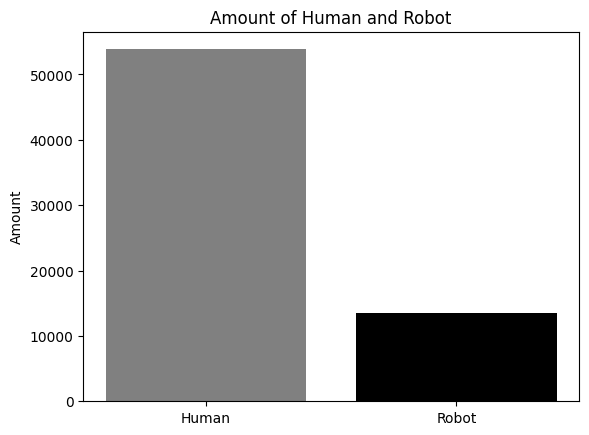

In [5]:
p_x = np.arange(2)
p_y = [y.value_counts()[0], y.value_counts()[1]]

plt.bar(p_x, p_y, color=['grey', 'black'])
plt.xticks(p_x, ('Human', 'Robot'))
plt.ylabel('Amount')
plt.title('Amount of Human and Robot')
plt.show()

In [6]:
df['NIGHT'].value_counts()

0.000000    62253
1.000000     4588
0.500000       32
0.333333       12
0.750000        7
            ...  
0.602941        1
0.529412        1
0.483871        1
0.830645        1
0.460526        1
Name: NIGHT, Length: 389, dtype: int64

In [7]:
df['OTHER_METHOD'].value_counts()

0.000000    67341
1.000000        4
0.064516        1
0.084746        1
0.032787        1
0.053571        1
0.030928        1
0.033333        1
0.028571        1
Name: OTHER_METHOD, dtype: int64

In [8]:
df = df.drop(['NIGHT', 'ID', 'OTHER_METHOD'], axis=1)